(6500, 5)
    pl   pw   sl   sw  id
0  5.0  3.5  1.3  0.3   1
1  4.8  3.0  1.4  0.2   2
2  4.7  3.2  1.3  0.2   3
3  4.6  3.2  1.5  0.2   4
4  4.9  3.4  1.3  0.2   5


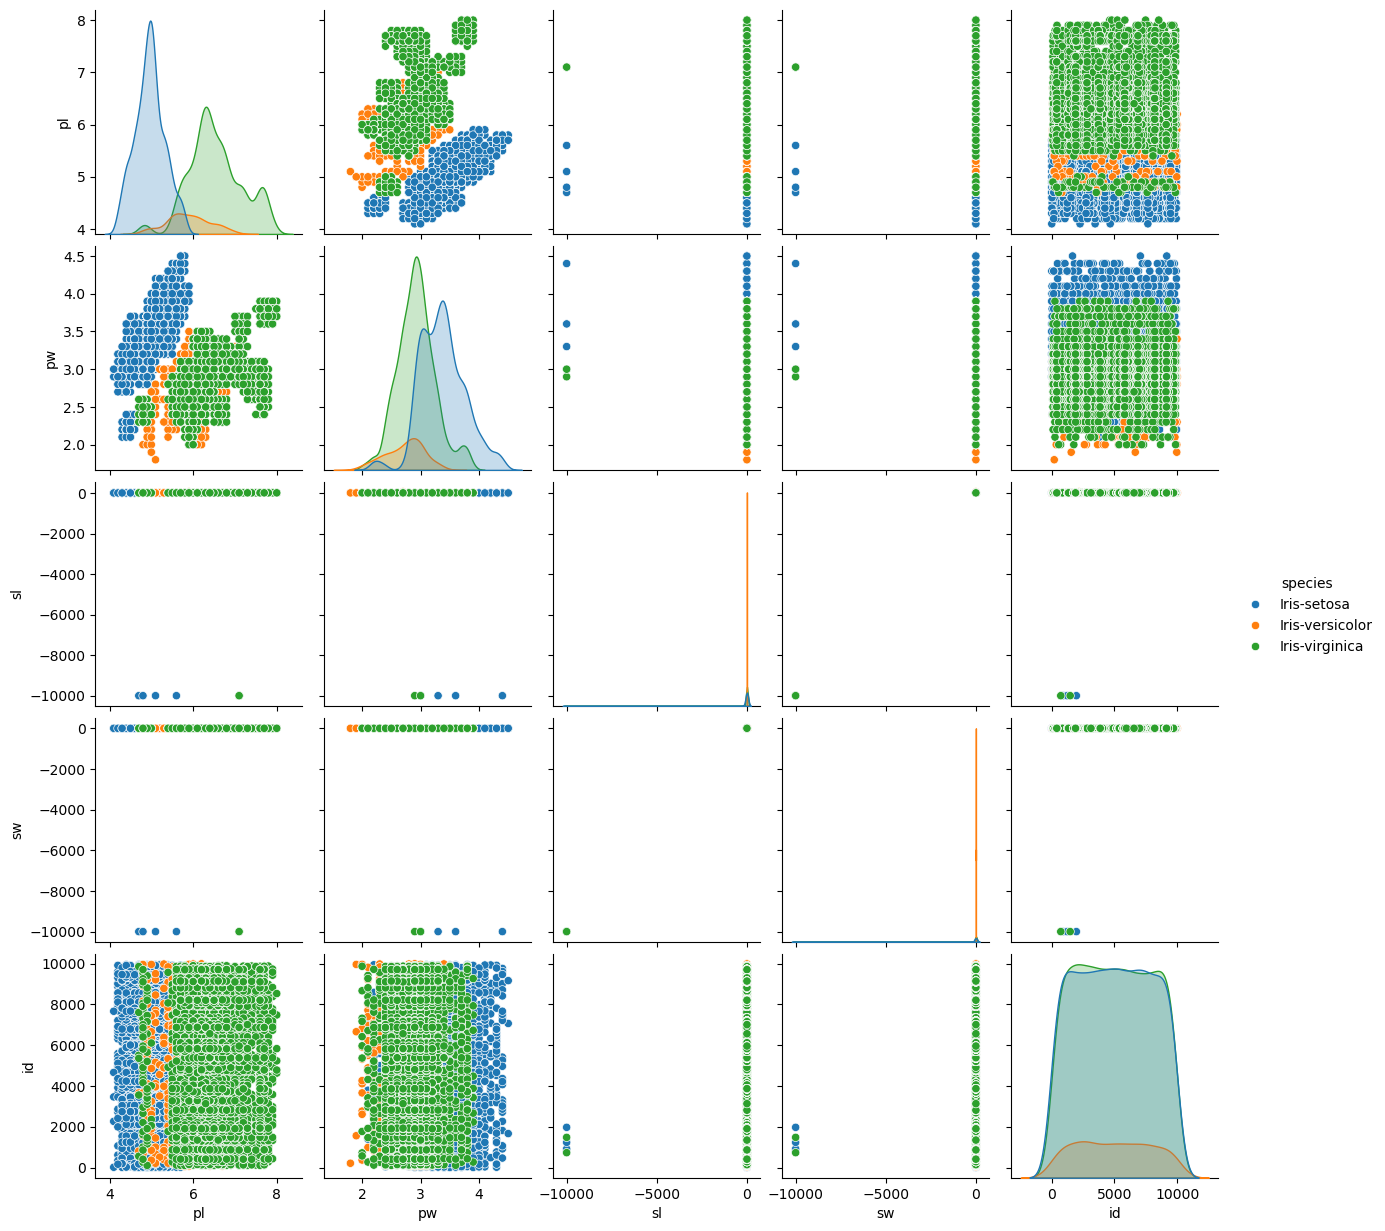

In [19]:
# Task 1
import pandas as pd
import numpy as np
import seaborn as sns


data = pd.read_csv("iris_data.csv", delimiter=";")
labels = pd.read_csv("iris_labels.csv",delimiter=";")

print(data.shape)
print(data.head())

data = pd . merge ( data , labels , on ="id", how ="inner")

data . drop ([ "examiner"] , axis =1 , inplace = True )

data = data . sort_values ("species")

sns . pairplot ( data , hue ="species")

In [17]:
## Task 2
print ( data . value_counts ("species"))


species
Iris-setosa        3000
Iris-virginica     3000
Iris-versicolor     500
Name: count, dtype: int64


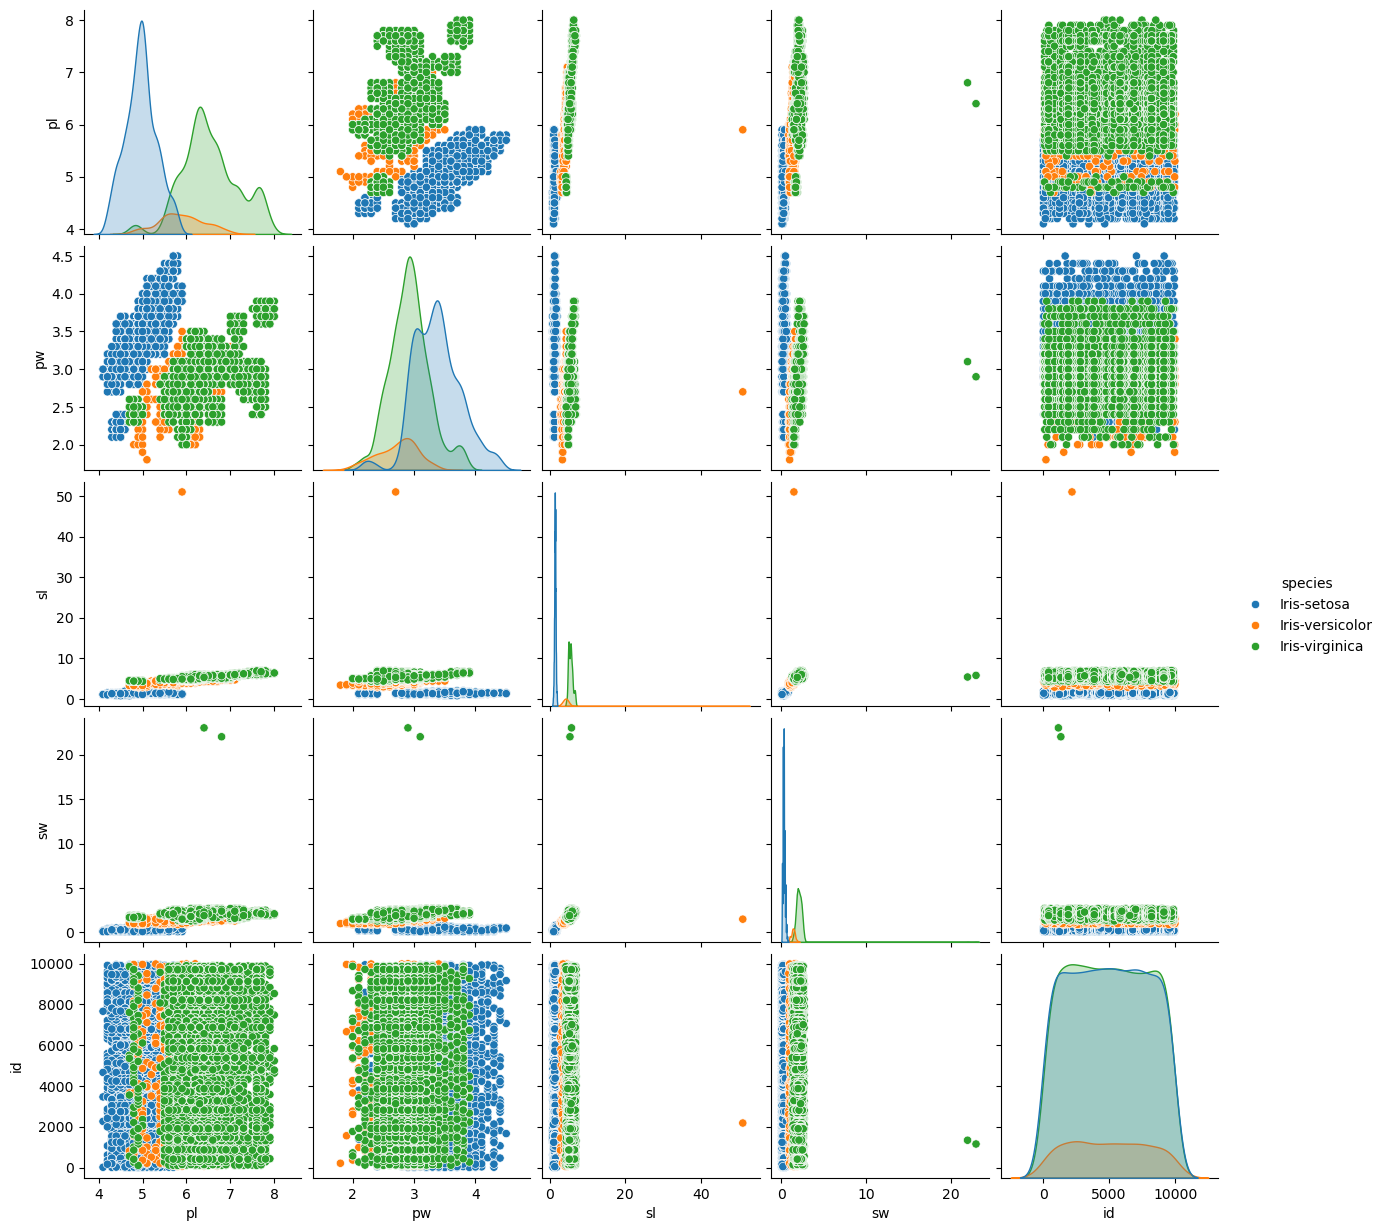

In [ ]:
## Task 3

data = data [ data ["pl"] != -9999]
data = data [ data ["pw"] != -9999]
data = data [ data ["sl"] != -9999]
data = data [ data ["sw"] != -9999]
sns . pairplot ( data , hue ="species")

In [42]:
## Task 4
numerical_data = data[['pl', 'pw', 'sl', 'sw', 'id']]
##4.1
from sklearn . preprocessing import MinMaxScaler
minmax_scaled = MinMaxScaler () . fit_transform ( numerical_data )
##4.2
from sklearn . preprocessing import StandardScaler
sd_scaled = StandardScaler () . fit_transform ( numerical_data )
##4.3
from sklearn . decomposition import PCA
pca = PCA ()
principal_components = pca . fit_transform ( numerical_data )
##4.4
pd.DataFrame(
	pca.components_,
	columns=["pl", "pw", "sl", "sw", "id"],
	index=["PC 1", "PC 2", "PC 3", "PC 4", "PC 5"]
).abs().mean(axis=0)

pl    0.353030
pw    0.308193
sl    0.344290
sw    0.283000
id    0.200001
dtype: float64